In [1]:
import sympy as sym

import numpy as np

import repeated_play

In [2]:
import itertools

In [3]:
from tqdm.notebook import tqdm

In [4]:
sym.init_printing(True)

In [5]:
b, c = sym.symbols("b, c")

In [6]:
import pandas as pd

**Functions**

In [7]:
def trnsf_transition_m_memory_two(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    else:
        M = np.array([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    
    
    return M

In [8]:
def trnsf_transition_m_memory_three(player, analytical=True):
    
    if analytical == False:
    
        return np.array([[coplayer[0], (1 - coplayer[0]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[1], (1 - coplayer[1]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[2], (1 - coplayer[2]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[3], (1 - coplayer[3])],
                        [coplayer[4], (1 - coplayer[4]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[5], (1 - coplayer[5]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[6], (1 - coplayer[6]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[7], (1 - coplayer[7])]])
    
    if analytical == True:

        return sym.Matrix([[coplayer[0], (1 - coplayer[0]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[1], (1 - coplayer[1]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[2], (1 - coplayer[2]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[3], (1 - coplayer[3])],
                        [coplayer[4], (1 - coplayer[4]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[5], (1 - coplayer[5]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[6], (1 - coplayer[6]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[7], (1 - coplayer[7])]])

### $n=1$ case

How many pure self-reactive strategies? 4?

In [9]:
pc = sym.symbols(r"p_c")

pd = sym.symbols(r"p_d")

In [10]:
pure_strategies = list(itertools.product([0, 1], repeat=2))

In [11]:
strategy = [pc, 0]

In [12]:
coplayer = pure_strategies[3] * 2

M = repeated_play.transition_matrix_repeated_game(coplayer, strategy * 2, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

print(sym.latex(sum(ss @ np.array([b - c, -c, b, 0])).simplify()))

# sym.solve(sum(ss @ np.array([b - c, -c, b, 0])), pc)

b p_{c} - c


In [13]:
sum(ss @ np.array([b - c, -c, b, 0])).factor().collect(pc)

In [14]:
strategy = [1, pd]

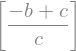

In [15]:
coplayer = pure_strategies[1] * 2

M = repeated_play.transition_matrix_repeated_game(coplayer, strategy * 2, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

sym.solve(sum(ss @ np.array([b - c, -c, b, 0])), pd)

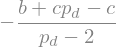

In [16]:
sum(ss @ np.array([b - c, -c, b, 0])).factor().collect(pc)

### $n=2$ case

In [17]:
pcc, pcd, pdc = sym.symbols("p_{CC}, p_{CD}, p_{DC}")

In [18]:
pure_strategies = list(itertools.product([0, 1], repeat=4))

In [19]:
len(pure_strategies)

In [20]:
strategy = [pcc, pcd, pdc, 0]

In [21]:
payoffs = []

for num, coplayer in tqdm(enumerate(pure_strategies)):
    
    M = trnsf_transition_m_memory_two(coplayer, analytical=False)

    stationaries = repeated_play.stationary_distribution(M)
    
    for ss in stationaries:

        rho_q = ss[0] + ss[1]

        rho_p = sum([ss[i] * p for i, p in enumerate(strategy)])


        payoff_q = (rho_p * b - c * rho_q)

        payoffs.append((num, sym.nsimplify(payoff_q)))

0it [00:00, ?it/s]

In [22]:
len(payoffs)

In [23]:
[payoff[0] for payoff in payoffs if payoff[1] == 0]

In [24]:
print(sym.latex(payoffs[11][1]))

b p_{CC} - c


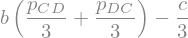

In [25]:
x = payoffs[1][1]
x

In [26]:
[payoff[0] for payoff in payoffs if (payoff[1] - x) == 0]

In [27]:
payoff_expr = [p[1] for p in payoffs]

In [28]:
payoff_expr = list(set(payoff_expr))

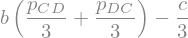

In [29]:
payoff_expr[1]

In [30]:
payoff_expr[2]

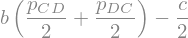

In [31]:
payoff_expr[3]

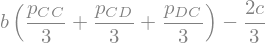

In [32]:
payoff_expr[4]

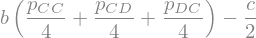

In [33]:
payoff_expr[5]

### $n=3$ case

In [34]:
pccc, pccd, pcdc, pcdd, pdcc, pdcd, pddc =  sym.symbols("p_{CCC}, p_{CCD}, p_{CDC}, p_{CDD}, p_{DCC}, p_{DCD}, p_{DDC}")

In [35]:
pure_strategies = list(itertools.product([0, 1], repeat=8))

In [36]:
strategy = [pccc, pccd, pcdc, pcdd, pdcc, pdcd, pddc, 0]

In [37]:
payoffs = []

for num, coplayer in tqdm(enumerate(pure_strategies)):
    
    M = trnsf_transition_m_memory_three(coplayer, analytical=False)

    stationaries = repeated_play.stationary_distribution(M)
    
    for ss in stationaries:

        rho_q = ss[0] + ss[1] + ss[4] + ss[5]

        rho_p = sum([ss[i] * p for i, p in enumerate(strategy)])


        payoff_q = (rho_p * b - c * rho_q)

        payoffs.append((num, sym.nsimplify(payoff_q)))

0it [00:00, ?it/s]

In [38]:
payoff_expr = [p[1] for p in payoffs]

In [39]:
payoff_expr = list(set(payoff_expr))

In [40]:
len(payoff_expr)

In [41]:
[payoff[0] for payoff in payoffs if payoff[1] == 0]

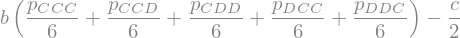

In [146]:
x = payoff_expr[14]
x

In [147]:
print(sym.latex(x))

b \left(\frac{p_{CCC}}{6} + \frac{p_{CCD}}{6} + \frac{p_{CDD}}{6} + \frac{p_{DCC}}{6} + \frac{p_{DDC}}{6}\right) - \frac{c}{2}


In [148]:
[payoff[0] for payoff in payoffs if (payoff[1] - x) == 0]

### Group 1

In [159]:
payoff_expr[0]

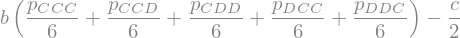

In [101]:
payoff_expr[1]

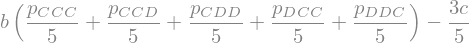

In [117]:
payoff_expr[2]

### Group 2

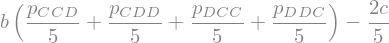

In [118]:
payoff_expr[3]

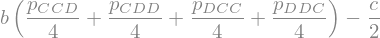

In [160]:
payoff_expr[11]

### Group 2.5

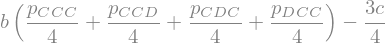

In [121]:
payoff_expr[5]

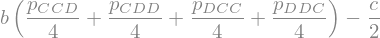

### Group 3

In [133]:
payoff_expr[13]

### Group 4

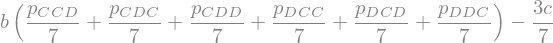

In [134]:
payoff_expr[4]

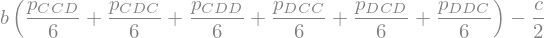

In [142]:
payoff_expr[12]

### Group 5

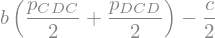

In [143]:
payoff_expr[6]

### Group 6

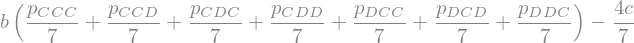

In [150]:
payoff_expr[7]

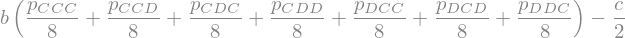

In [153]:
payoff_expr[10]

### Group 7

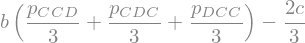

In [147]:
payoff_expr[8]

### Group 8

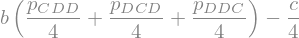

In [149]:
payoff_expr[9]

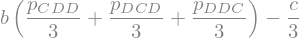

In [158]:
payoff_expr[14]

### Numerical Checks

In [1]:
def match_payoff(player, coplayer, b, c, memory):
    if memory == "two":
        M = trnsf_transition_m_memory_two(coplayer, analytical=False)
    elif memory == "three":
        M = trnsf_transition_m_memory_three(coplayer, analytical=False)

    ss = repeated_play.stationary_distribution(M)[0]
    
    if memory == "two":
        
        rho_q = ss[0] + ss[1]
        
    elif memory == "three":
        
        rho_q = ss[0] + ss[1] + ss[4] + ss[5]
        

    rho_p = sum([ss[i] * p for i, p in enumerate(player)])


    payoff_q = (rho_p * b - c * rho_q)
    
    return payoff_q

### Memory-Two

In [211]:
max_iterations = 10 ** 5

bval = 1; cval = 0.3

dnash, gnash, notdnash, notgnash = [], [], [], []

pure_strategies = list(itertools.product([0, 1], repeat=2))

for i in tqdm(range(max_iterations)):
    
    np.random.seed(i)
    
    player = np.random.random(4)
    player[-1] = 0
    
    checksA = []
    
    for coplayer in pure_strategies:
        
        M = repeated_pl
        
        payoff_q = match_payoff(player, coplayer, bval, cval, one)
        
        checkA = np.isclose(payoff_q, 0, atol=10 ** -4) or payoff_q < 0
        
        checksA.append(checkA)
        
        checkB = np.isclose(payoff_q, bval - cval, atol=10 ** -4) or payoff_q < bval - cval
        
        checksB.append(checkB)
    
    if all(checksA) == True:
        dnash.append([i, *player, *checksA])
    else:
        notdnash.append([i, *player, *checksA])
        
        
    if all(checksb) == True:
        nash.append([i, *player, *checksb])
    else:
        notnash.append([i, *player, *checksb])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [212]:
columns = ["I", "pcc", "pcd", "pdc", "pdd"] + [f"N{i}" for i in range(16)]

columns2 = ["I", "pccc", "pccd", "pcdc", "pcdd", "pdcc", "pdcd", "pddc", "pddd",] + [f"N{i}" for i in range(256)]

In [213]:
strategies_col = [f"N{i}" for i in range(16)]

In [214]:
df_nash = pd.DataFrame(nash, columns=columns)

In [217]:
df_nash.head()

,I,pcc,pcd,pdc,pdd,N0,N1,N2,N3,N4,...,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15
0,126,0.105172,0.128144,0.087406,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,266,0.079664,0.002455,0.244384,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,273,0.072729,0.064944,0.063570,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,334,0.238137,0.032485,0.124268,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,351,0.011266,0.283025,0.008941,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [215]:
df_nonash = pd.DataFrame(notnash, columns=columns)

In [218]:
# df_nash[df_nash["pcc"] > c / b]

In [285]:
df_nash[(df_nash["pcd"] + df_nash["pdc"] > c / b)][]

,I,pcc,pcd,pdc,pdd,N0,N1,N2,N3,N4,...,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15
416,28697,0.153943,0.128801,0.171344,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
983,71596,0.195834,0.289732,0.010345,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1249,92685,0.001390,0.037334,0.262762,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1261,93558,0.151320,0.071896,0.228225,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1285,95447,0.288175,0.131974,0.168140,0.0,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [220]:
(df_nonash["pcc"] < c / b).all()

False

In [221]:
(df_nonash["pcd"] + df_nonash["pdc"] < c / b).all()

False

In [286]:
for column in strategies_col:
    print(column, df_nonash[df_nonash['N4'] == True][column].unique())

N0 [ True]
N1 [ True]
N2 [ True]
N3 [False  True]
N4 [ True]
N5 [ True]
N6 [False  True]
N7 [False  True]
N8 [ True]
N9 [ True]
N10 [ True]
N11 [False]
N12 [ True]
N13 [ True]
N14 [False]
N15 [False]


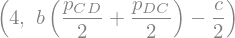

In [257]:
payoffs[4]

In [266]:
payoffs[16]

### Memory-Three

In [232]:
max_iterations = 10 ** 2

bval = 1; cval = 0.7

nash, notnash = [], []

pure_strategies = list(itertools.product([0, 1], repeat=8))

for i in tqdm(range(max_iterations)):
    
    np.random.seed(10 ** 5 + i)
    
    player = np.random.random(8)
    player[-1] = 0
    
    checks = []
    
    for coplayer in pure_strategies:
        
        payoff_q = match_payoff(player, coplayer, bval, cval, "three")
        check = np.isclose(payoff_q, 0, atol=10 ** -4) or payoff_q < 0
        
        checks.append(check)
    
    if all(checks) == True:
        nash.append([i, *player, *checks])
    else:
        notnash.append([i, *player, *checks])

  0%|          | 0/100 [00:00<?, ?it/s]

In [233]:
df_nash = pd.DataFrame(nash, columns=columns2)

In [234]:
df_nash.head()

,I,pccc,pccd,pcdc,pcdd,pdcc,pdcd,pddc,pddd,N0,...,N246,N247,N248,N249,N250,N251,N252,N253,N254,N255


In [198]:
df_nonash = pd.DataFrame(notnash, columns=columns2)

In [199]:
df_nonash.head()

,I,pccc,pccd,pcdc,pcdd,pdcc,pdcd,pddc,pddd,N0,...,N246,N247,N248,N249,N250,N251,N252,N253,N254,N255
0,0,0.287561,0.508248,0.498041,0.781669,0.122403,0.289857,0.027185,0.0,True,...,False,False,False,False,True,True,True,True,True,True
1,1,0.183038,0.153983,0.610958,0.981568,0.296935,0.792112,0.880133,0.0,True,...,False,False,False,False,True,True,True,True,True,True
2,2,0.952293,0.802828,0.559997,0.031477,0.109590,0.945776,0.722016,0.0,True,...,False,False,False,False,False,False,False,False,False,False
3,3,0.303284,0.785160,0.784346,0.134653,0.017943,0.906211,0.601528,0.0,True,...,False,False,False,False,False,False,False,False,False,False
4,4,0.312267,0.775573,0.332939,0.770565,0.759004,0.291284,0.470420,0.0,True,...,False,False,False,False,False,False,False,False,False,False


In [207]:
df_nonash[(df_nonash['pccc'] < cval / bval) & (np.isclose(df_nonash['pccc'], cval / bval, atol=10 ** -4))]

,I,pccc,pccd,pcdc,pcdd,pdcc,pdcd,pddc,pddd,N0,...,N246,N247,N248,N249,N250,N251,N252,N253,N254,N255


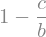

In [244]:
1 - c / (3 * b) - (2 * c) / (3 * b)

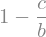

In [245]:
1 - 2 * c / (3 * b) - (c) / (3 * b)

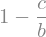

In [246]:
1 - c / (2 * b) - (c) / (2 * b)

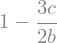

In [247]:
1 - c / (2 * b) - (c) / (b)

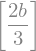

In [249]:
sym.solve((3 * c) / (2 * b) - 1, c)